In [21]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
from skimage.util import random_noise
import PIL
from tqdm import tqdm

In [22]:
from read_raw_data import get_mias_data, get_dx_data
from gaussian_noise_transform import GaussianNoise

## Process MIAS train data

In [23]:
# 128 x 128 pixels
img_size = 128 # 

# load MIAS. mias_train_data has shape [300, 1024, 1024, 1]
mias_raw_data = get_mias_data("mias_train_raw")

# define transformation tensors
totensor = transforms.ToTensor()
resize = transforms.Resize((img_size, img_size))

# list of variance for gaussian noise to add
var_noise_list = [0.005, 0.01, 0.02, 0.05, 0.08]

# tensors to store ground truth and corresponding noisy samples
mias_train_gt = torch.empty(size=(0, 1, img_size, img_size), dtype=float)
mias_train_noisy = torch.empty(size=(0, 1, img_size, img_size), dtype=float)

# apply transformations sequentially and append to mias_full
for data in tqdm(mias_raw_data):
    data = resize(totensor(data))
    for var in var_noise_list:
        gaussian_noise = GaussianNoise(mean=0, var=var)
        mias_train_gt = torch.cat((mias_train_gt, data.unsqueeze(dim=0)), dim=0)
        noisy_data = torch.tensor(gaussian_noise(data)) # GaussianNoise returns np array, so cast to tensor
        mias_train_noisy = torch.cat((mias_train_noisy, noisy_data.unsqueeze(dim=0)), dim=0)
        
## mias_train_gt and mias_train_noisy have shapes [1500, 1, 128, 128]

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:10<00:00,  4.27it/s]


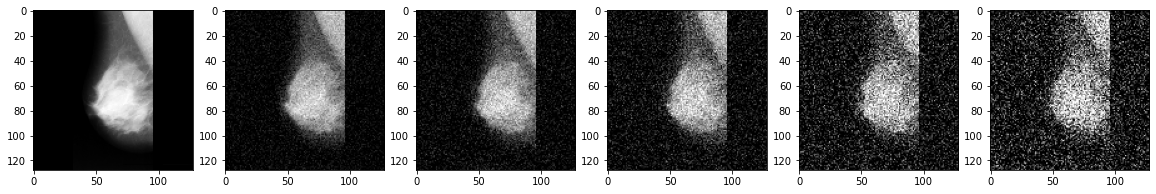

In [24]:
## Plot some sample data

fig, axes = plt.subplots(1,6, figsize=(20,60))
axes[0].imshow(mias_train_gt[0].squeeze(), cmap='gray')
for i in range(5):
    axes[i+1].imshow(mias_train_noisy[i].squeeze(), cmap='gray')
plt.show()

In [25]:
torch.save(mias_train_gt, "mias_train_gt.pt")
torch.save(mias_train_noisy, "mias_train_noisy.pt")

## Process MIAS test data

In [26]:
# load MIAS. mias_test_data has shape [22, 1024, 1024, 1]
mias_raw_data = get_mias_data("mias_test_raw", test=True)

# tensors to store ground truth and corresponding noisy samples
mias_test_gt = torch.empty(size=(0, 1, img_size, img_size), dtype=float)
mias_test_noisy = torch.empty(size=(0, 1, img_size, img_size), dtype=float)

# apply transformations sequentially and append to mias_full
for data in tqdm(mias_raw_data):
    data = resize(totensor(data))
    for var in var_noise_list:
        gaussian_noise = GaussianNoise(mean=0, var=var)
        mias_test_gt = torch.cat((mias_test_gt, data.unsqueeze(dim=0)), dim=0)
        noisy_data = torch.tensor(gaussian_noise(data)) # GaussianNoise returns np array, so cast to tensor
        mias_test_noisy = torch.cat((mias_test_noisy, noisy_data.unsqueeze(dim=0)), dim=0)
        
## mias_train_gt and mias_train_noisy have shapes [110, 1, 128, 128]

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 37.66it/s]


In [27]:
torch.save(mias_test_gt, "mias_test_gt.pt")
torch.save(mias_test_noisy, "mias_test_noisy.pt")

## Process DX train data

In [29]:
# load DX. mias_train_data has shape [300, 2400, 1935, 1]
dx_raw_data = get_dx_data("dx_train_raw")

# tensors to store ground truth and corresponding noisy samples
dx_train_gt = torch.empty(size=(0, 1, img_size, img_size), dtype=float)
dx_train_noisy = torch.empty(size=(0, 1, img_size, img_size), dtype=float)

# apply transformations sequentially and append to mias_full
for data in tqdm(dx_raw_data):
    data = resize(totensor(data))
    for var in var_noise_list:
        gaussian_noise = GaussianNoise(mean=0, var=var)
        dx_train_gt = torch.cat((dx_train_gt, data.unsqueeze(dim=0)), dim=0)
        noisy_data = torch.tensor(gaussian_noise(data))
        dx_train_noisy = torch.cat((dx_train_noisy, noisy_data.unsqueeze(dim=0)), dim=0)
        
## dx_train_gt and dx_train_noisy have shapes [1500, 1, 128, 128]

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [01:08<00:00,  4.37it/s]


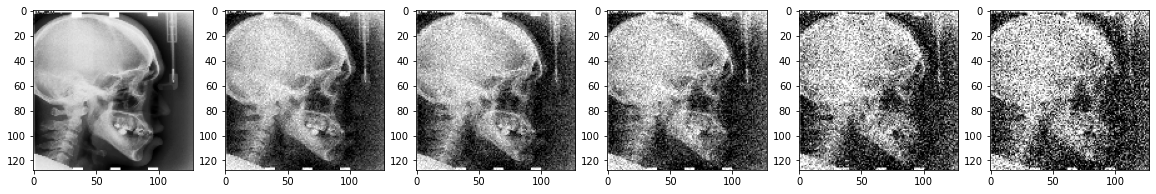

In [30]:
## Plot some sample data

fig, axes = plt.subplots(1,6, figsize=(20,60))
axes[0].imshow(dx_train_gt[0].squeeze(), cmap='gray')
for i in range(5):
    axes[i+1].imshow(dx_train_noisy[i].squeeze(), cmap='gray')
plt.show()

In [31]:
torch.save(dx_train_gt, "dx_train_gt.pt")
torch.save(dx_train_noisy, "dx_train_noisy.pt")

In [32]:
# load DX. mias_test_data has shape [300, 1024, 1024, 1]
dx_raw_data = get_dx_data("dx_test_raw", test=True)

# tensors to store ground truth and corresponding noisy samples
dx_test_gt = torch.empty(size=(0, 1, img_size, img_size), dtype=float)
dx_test_noisy = torch.empty(size=(0, 1, img_size, img_size), dtype=float)

# apply transformations sequentially and append to mias_full
for data in tqdm(dx_raw_data):
    data = resize(totensor(data))
    for var in var_noise_list:
        gaussian_noise = GaussianNoise(mean=0, var=var)
        dx_test_gt = torch.cat((dx_test_gt, data.unsqueeze(dim=0)), dim=0)
        noisy_data = torch.tensor(gaussian_noise(data))
        dx_test_noisy = torch.cat((dx_test_noisy, noisy_data.unsqueeze(dim=0)), dim=0)
        
## dx_test_gt and dx_test_noisy have shapes [500, 1, 128, 128]

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.40it/s]


In [33]:
torch.save(dx_test_gt, "dx_test_gt.pt")
torch.save(dx_test_noisy, "dx_test_noisy.pt")

In [34]:
def psnr(clean_imgs, noisy_imgs):
    clean_imgs = clean_imgs.squeeze()
    noisy_imgs = noisy_imgs.squeeze()
    
    # mean over height and width (image)
    mse = torch.mean( (clean_imgs - noisy_imgs) ** 2 , (-2,-1))
    
    # max over height and width (image)
    maxf = torch.max(clean_imgs, -1)
    maxf = torch.max(maxf.values, -1)
    
    # mean psnr over batch
    psnr = torch.mean(20 * torch.log10(torch.divide(maxf.values, torch.sqrt(mse))))
    return psnr

In [35]:
psnr(dx_test_gt, dx_test_noisy)

tensor(17.5594, dtype=torch.float64)